In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from transformers import AutoTokenizer, AutoModelForCausalLM
import datasets
from datasets import load_dataset

from utils import add_size, sample_eval_losses

/opt/conda/envs/venv2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load dataset and model
ds = load_dataset('BigCode/github_dump_python_only_any_license_decompressed', use_auth_token=True, streaming=True, split="train")

tokenizer_all_license = AutoTokenizer.from_pretrained("BigCode/gpt_345_python_only_any_license", use_auth_token=True)
model_all_license = AutoModelForCausalLM.from_pretrained("BigCode/gpt_345_python_only_any_license", use_auth_token=True)

tokenizer_safe_license = AutoTokenizer.from_pretrained("BigCode/gpt_345_python_only_safe_licenses_v2", use_auth_token=True)
model_safe_license = AutoModelForCausalLM.from_pretrained("BigCode/gpt_345_python_only_safe_licenses_v2", use_auth_token=True)

Using custom data configuration BigCode--github_dump_python_only_any_license_decompressed-085fab7517ca812b


In [3]:
# dataset of 10k random samples with size info
all_ds = ds.shuffle(seed=42)
all_ds = list(all_ds.take(10_000))
subset_all_ds = datasets.Dataset.from_pandas(pd.DataFrame(data=all_ds))
subset_all_ds = subset_all_ds.map(add_size)

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 12367.50ex/s]


In [5]:
losses_all, losses_safe = sample_eval_losses(model_all_license, model_safe_license, tokenizer_all_license, tokenizer_safe_license, subset_all_ds, n=len(subset_all_ds))

100%|█████████████████████████████████████| 10000/10000 [26:17<00:00,  6.34it/s]


(0.0, 3.0)

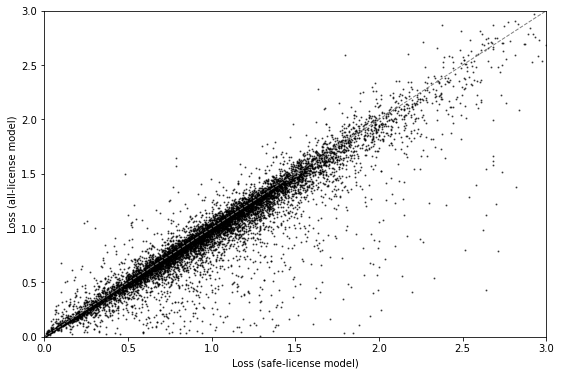

In [9]:
plt.figure(figsize=(9,6))
plt.scatter(losses_safe, losses_all, s=1, c='black', alpha=0.6)
plt.plot(np.linspace(0,3, 10), np.linspace(0,3, 10), color='gray', linestyle='--', linewidth=1)
plt.xlabel('Loss (safe-license model)')
plt.ylabel('Loss (all-license model)')
plt.xlim([0, 3])
plt.ylim([0, 3])

With a colormap

(0.0, 3.0)

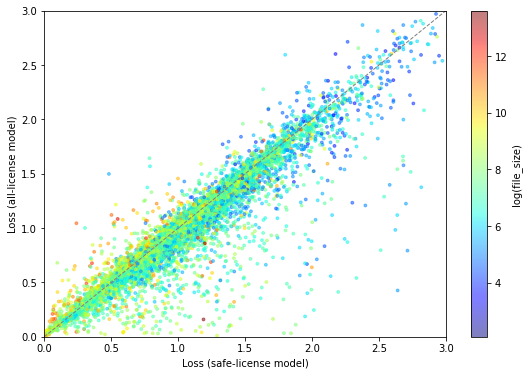

In [18]:
sizes = subset_all_ds['size']
nsamples = 9000
plt.figure(figsize=(9,6))
plt.scatter(losses_safe[:nsamples], losses_all[:nsamples], s=8, c=np.log(sizes[:nsamples]), alpha=0.5, cmap='jet')
plt.plot(np.linspace(0,3, 10), np.linspace(0,3, 10), color='gray', linestyle='--', linewidth=1)
cbar = plt.colorbar()
cbar.set_label("log(file_size)")
plt.xlabel('Loss (safe-license model)')
plt.ylabel('Loss (all-license model)')
plt.xlim([0, 3])
plt.ylim([0, 3])

In [16]:
indexes = np.where((np.array(losses_all)<0.02) & (np.array(losses_all)<np.array(losses_safe)))[0]
print(f"number indexes {len(indexes)}")
print(indexes)

number indexes 6
[ 615  794 1383 1764 6865 7279]


In [24]:
print(subset_all_ds[int(indexes[0])]["content"])

# coding=utf-8
# --------------------------------------------------------------------------
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License. See License.txt in the project root for license information.
# Code generated by Microsoft (R) AutoRest Code Generator.
# Changes may cause incorrect behavior and will be lost if the code is regenerated.
# --------------------------------------------------------------------------
from typing import Any, AsyncIterable, Callable, Dict, Generic, Optional, TypeVar, Union
import warnings

from azure.core.async_paging import AsyncItemPaged, AsyncList
from azure.core.exceptions import ClientAuthenticationError, HttpResponseError, ResourceExistsError, ResourceNotFoundError, map_error
from azure.core.pipeline import PipelineResponse
from azure.core.pipeline.transport import AsyncHttpResponse, HttpRequest
from azure.core.polling import AsyncLROPoller, AsyncNoPolling, AsyncPollingMethod
from azure.mgmt.core.except